# Load Patterning & Envelopes

This notebook demonstrates the use of `PyCBA` for constructing load effect envelopes from patterned loading. The `LoadPattern` class is used to calculate the design envelopes from load patterning dead and live loads. The load factors corresponding to the maximum and minimum values of the nominal loads are supplied, along with the "load matrices" for dead and live load.

In [56]:
import pycba as cba
import numpy as np
import matplotlib.pyplot as plt

## Example 1: Hulse & Mosley
Here we consider a 3-span beam from Hulse & Mosley, *Reinforced Concrete Design By Computer* (1986) which uses the load pattern from the (now superseded) British Standards:
- MAX = 1.4 Gk + 1.6 Qk 
- MIN = 1.0 Gk
The beam is subjected to nominal dead and live UDLs of $w_g = 25$ kN/m and $w_q = 10$ kN/m respectively.

First establish the beam as usual:

In [57]:
L = [6,4,6]
EI = 30 * 10e9 * 1e-6
R = [-1,0,-1,0,-1,0,-1,0]
beam_analysis = cba.BeamAnalysis(L, EI, R)

Now set the dead load matrix and maximum and minimum load factors:

In [58]:
LMg = [[1,1,25,0,0],
       [2,1,25,0,0],
       [3,1,25,0,0]]
γg_max = 1.4
γg_min = 1.0

And the same for the live load:

In [59]:
LMq = [[1,1,10,0,0],
       [2,1,10,0,0],
       [3,1,10,0,0]]
γq_max = 1.6
γq_min = 0

Now create the `LoadPattern` object by passing the `BeamAnalysis` object. Assign the dead and live load information and then analyze and plot.

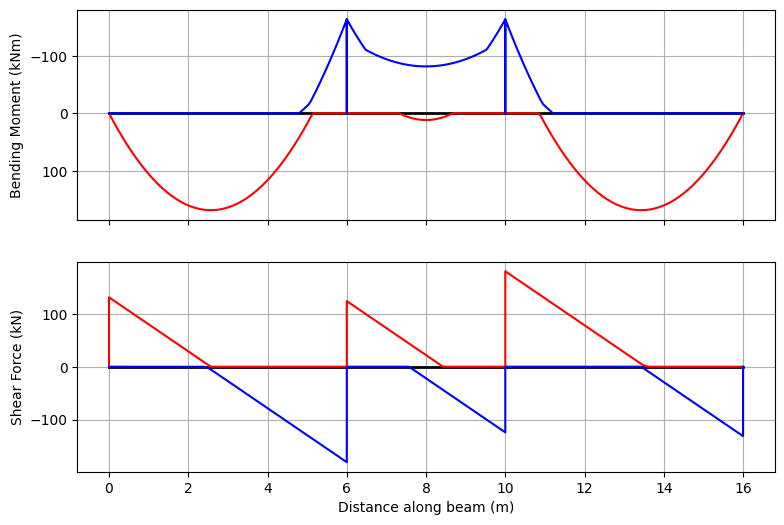

In [60]:
lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMg,γg_max,γg_min)
lp.set_live_loads(LMq,γq_max,γq_min)
env = lp.analyze()
env.plot(figsize=(9,6));

And let's confirm that the results match the book (Section 2.3.6) to the second decimal place (`atol=1e-2`). To do this, we find the results from our analysis for key locations for moments and shears and confirm they match the book. First, the moments:

In [61]:
m_locs = np.array([3, 6, 8, 10, 13])
idx = [(np.abs(env.x - x)).argmin() for x in m_locs]
mmx = np.allclose(env.Mmax[idx],np.array([163.79, 0, 11.75, 0, 163.79]),atol=1e-2)
mmn = np.allclose(env.Mmin[idx],np.array([0, -163.38, -81.42, -163.38, 0]),atol=1e-2)
print(mmx,mmn)

True True


The shear is a little more complex because of the way load effects are calculated along the beam. For $n$ points requested (e.g. 100), there are nominally $n+1$ points to include the start and end. However, because we also want to 'close' the shear force diagram (see above), we include two more duplicated points at the end, so there are $n+3$ points per span; and we want to extract the maximum and minium shear forces along each span, and not including these end points.

In [62]:
n = beam_analysis.beam_results.npts
nspans = beam_analysis.beam.no_spans
Vmax = np.array([np.max(env.Vmax[i*(n+3):(i+1)*(n+3)]) for i in range(nspans)])
vmx = np.allclose(Vmax,np.array([131.1, 123.94, 180.23]),atol=1e-2)
Vmin = np.array([np.min(env.Vmin[i*(n+3):(i+1)*(n+3)]) for i in range(nspans)])
vmn = np.allclose(Vmin,np.array([-180.23, -123.94, -131.10]),atol=1e-2)
print(vmx,vmn)

True True


## Example 2: 5-span Beam
In this example we use Eurocode load factors for which the load pattern is
- MAX = 1.35 Gk + 1.5Qk 
- MIN = 0.9 Gk

Make the beam as before:

In [63]:
L = [6.5,8.3,8.3,8.3,6.5]
EI = 30 * 10e9 * 1e-6
R = [-1,0,-1,0,-1,0,-1,0,-1,0,-1,0]
beam_analysis = cba.BeamAnalysis(L, EI, R)

And define the loads:

In [64]:
LMg = [[1,1,10.3,0,0],
       [2,1,10.3,0,0],
       [3,1,10.3,0,0],
       [4,1,10.3,0,0],
       [5,1,10.3,0,0]]
γg_max = 1.35
γg_min = 0.9

LMq = [[1,1,12.5,0,0],
       [2,1,12.5,0,0],
       [3,1,12.5,0,0],
       [4,1,12.5,0,0],
       [5,1,12.5,0,0]]
γq_max = 1.5
γq_min = 0

And now automatically pattern as before. However, in this case, we desire to calculate the load effects at 200 pts along each span.

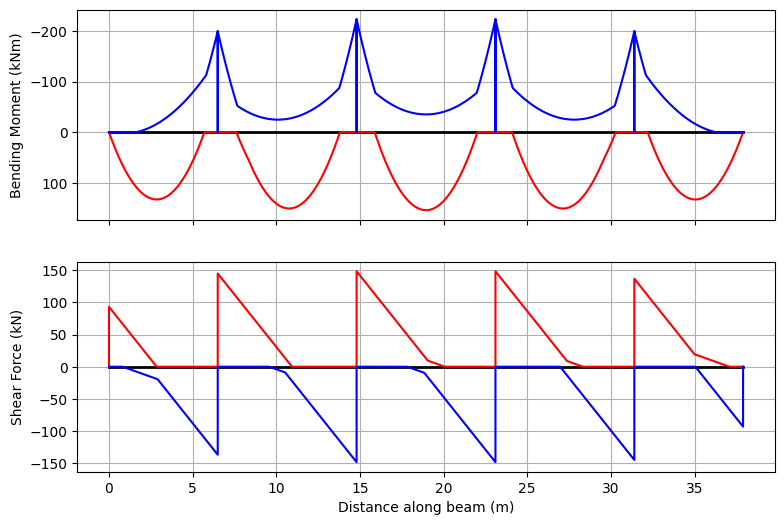

In [65]:
lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMg,γg_max,γg_min)
lp.set_live_loads(LMq,γq_max,γq_min)
env = lp.analyze(npts=200)
env.plot(figsize=(9,6));

We can also choose to plot each bending moment and shear force diagram in the envelope:

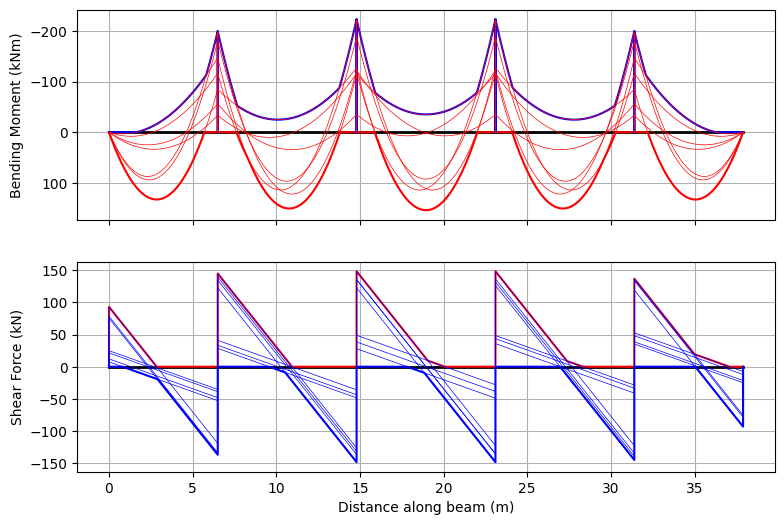

In [66]:
env.plot(each=True,figsize=(9,6));

## Example 3: 4-Span Beam
Here we consider a 4-span beam subjec to nominal dead and live UDLs of $w_g = 20$ kN/m and $w_q = 30$ kN/m respectively. Here we use a modified load pattern from the old British Standards, conservatively allowing dead load to be less than the nominal estimate: 
- MAX = 1.4 Gk + 1.6 Qk 
- MIN = 0.9 Gk

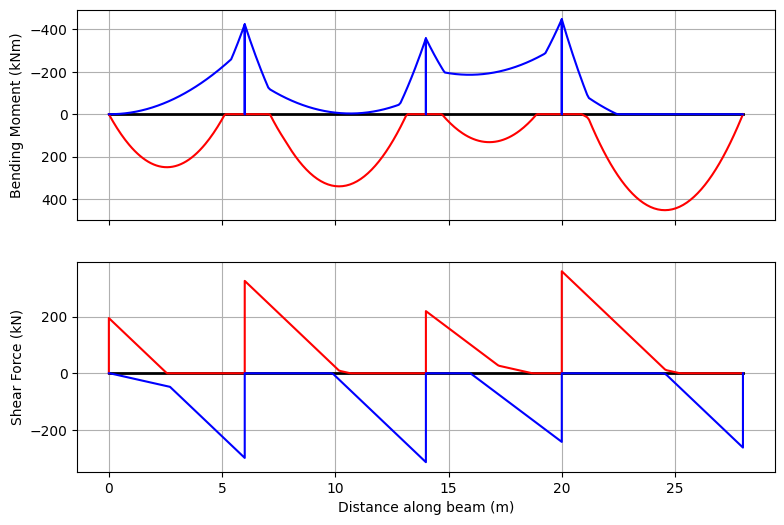

In [67]:
L = [6,8,6,8]
EI = 30 * 10e9 * 1e-6
R = [-1,0,-1,0,-1,0,-1,0,-1,0]
beam_analysis = cba.BeamAnalysis(L, EI, R)

LMg = [[1,1,20,0,0],
       [2,1,20,0,0],
       [3,1,20,0,0],
       [4,1,20,0,0]]
γg_max = 1.4
γg_min = 0.9

LMq = [[1,1,30,0,0],
       [2,1,30,0,0],
       [3,1,20,0,0],
       [4,1,30,0,0]]
γq_max = 1.6
γq_min = 0

lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMg,γg_max,γg_min)
lp.set_live_loads(LMq,γq_max,γq_min)
env = lp.analyze()
env.plot(figsize=(9,6));

## Example continuous beam to UK Assessment Code CS 454

## Live Loading (CS454)
The intensity of the traffic loading for model 2 in CS454 is dependant on the loaded length (CS454 Table 5.19a). Therefore, we need to consider and envelope different possible live load arrangements to get the most onerous effects. To simplify the problem we will either apply loading the the full lenght of a span or not at all. This may not produce the most analyically onersou effect but will be very close.




In [68]:
L_1=12 #Loaded length for 1 span
L_2=24 #Loaded length for 2 spans
L_3 =36 #Loaded Lenth for 3 spans
L_4 = 48 #Loaded length for 4 spans
UDL_1 =230/(L_1**0.67) #Intensity of UDL load for 1 span
UDL_2 =336/(L_2**0.67)*1/(1.92-0.023*L_2) #Intensity of UDL load for 2 spans
UDL_3 = UDL_2 #Intensity of UDL load for 3 spans
UDL_4 = 336/L_4**0.67 #Intensity of UDL load for 4 spans
KEL_1 = 82 #Knife edge load for 1 span 
KEL_2 = 120/(1.92-0.023*L_2) #knife edge load for 2 spans 
KEL_3 = KEL_2 #knife edge load for 3 spans
KEL_4 = 120 #knife edge load for 4 spans

Consider a long continuous bridge beam with many equal spans of 12m. We will analyse a sample of the spans (6) to identify the worst load effects. First lets plot the influence lines for:
* Hogging at the support between spans 3,4 (36m)
* Sagging at the midspan of span 3 (30m)
* Shear force at the support between spans 3,4 (36m)

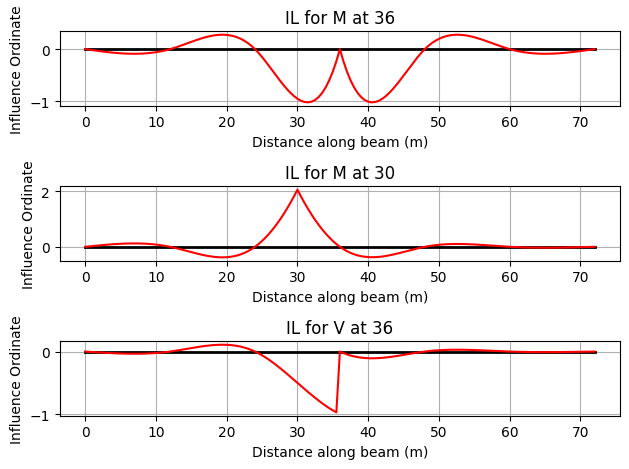

In [69]:
L = [12, 12, 12, 12, 12, 12]
R = [-1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0]
EI = 210* 900* 1e-6
ils = cba.InfluenceLines(L, EI, R)
ils.create_ils(step=0.5)
il_V = ils.get_il(36,'V')
il_M_hog = ils.get_il(36, 'M')
fig, axs  = plt.subplots(nrows=3, ncols=1)
ils.plot_il(36, 'M', axs[0])
ils.plot_il(30, 'M',axs[1])
ils.plot_il(36, 'V' ,axs[2])
plt.show()

It can be seen from the IL diagrams that:

* To create the largest shear force the KEL should be placed at 36m and the UDL placed in span 3&4 or spans 1,3,4,6
* To create the largets hogging moment the KEL should be placed at the centre of either spans 3,4 and the  UDL should be cover spans 3,4 or 1,3,4,63
* To create the largest sagging moment the KEL should be placed span 3 and the UDL in span 3 or 1,3,5. 


For dead load we will consider a 10kN/m load. As we are simply using the enveloping function and not the load patterning we can simply set equal load factors for the min and max load factors

In [70]:
γg_max = 1.2
γg_min = 1.2
γq_max = 1.35
γq_min = 1.35

We will now define a load model for dead load and multiple load models for the various live loading cases using list comprehension.

In [71]:
spans = [1,2,3,4,5,6]
#Add DL
LMg = [[s, 1 ,10,0,0] for s in spans]
           
#Live Loading - Create multipe load matricies for live load

# Load cases for sagging
LMs1 = ([[i, 1 ,UDL_1,0,0] for i in [4]] + [[i, 2 ,KEL_1,L[i]/2,0] for i in [4]])
LMs3 = ([[i, 1 ,UDL_3,0,0] for i in [2,4,6]] + [[i, 2 ,KEL_3,L[i]/2,0] for i in [4]])
# Load cases for hogging
LMh2 = ([[i, 1 ,UDL_2,0,0] for i in [3,4]] + [[i, 2 ,KEL_2,L[i]/2,0] for i in [4]])
LMh4 = ([[i, 1 ,UDL_4,0,0] for i in [1,3,4,6]] + [[i, 2 ,KEL_4,L[i]/2,0] for i in [4]])
# Load cases for shear force
LMsf2 = ([[i, 1 ,UDL_2,0,0] for i in [3,4]] + [[i, 2 ,KEL_2,0,0] for i in [4]])
LMsf4 = ([[i, 1 ,UDL_4,0,0] for i in [1,3,4,6]] + [[i, 2 ,KEL_4,0,0] for i in [4]])

LMq = [LMs1, LMs3, LMh2, LMh4, LMsf2, LMsf4]

Then we set up the analysis, create a dummy evelope with zero live load and then loop through each load case and augment the results into the evelope and finally plot the results.

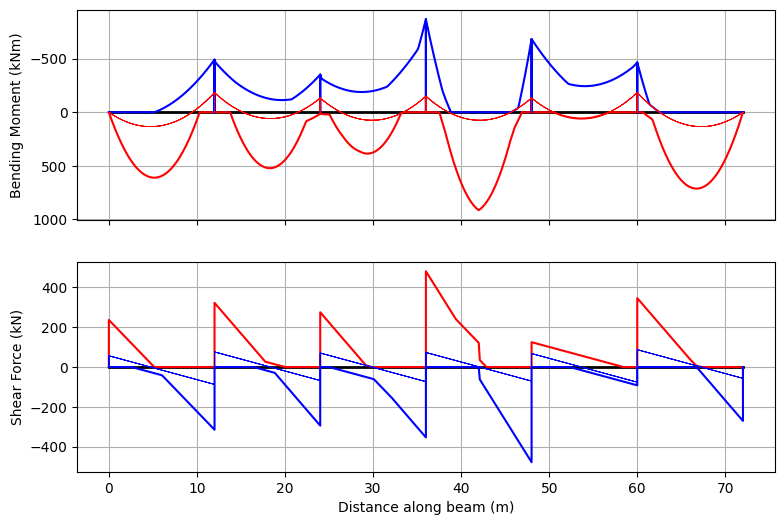

In [72]:
L = [12, 12, 12, 12, 12, 12]
R = [-1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0]
EI = 210* 1e-6
beam_analysis = cba.BeamAnalysis(L, EI, R)

lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMg,γg_max,γg_min)
# create dummy envelope for LL
lp.set_live_loads(LMg,0,0)
env = lp.analyze()

#Augment live load cases to dummy envelope
for i in range(len(LMq)):
        lp.set_live_loads(LMq[i],γq_max,γq_min)
        envi = lp.analyze()
        env.augment(envi)

env.plot(each=True, figsize=(9,6))
plt.show()
